In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


df = pd.read_csv('/content/tips.csv')
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [51]:
print(df.isna().sum())

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


In [52]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


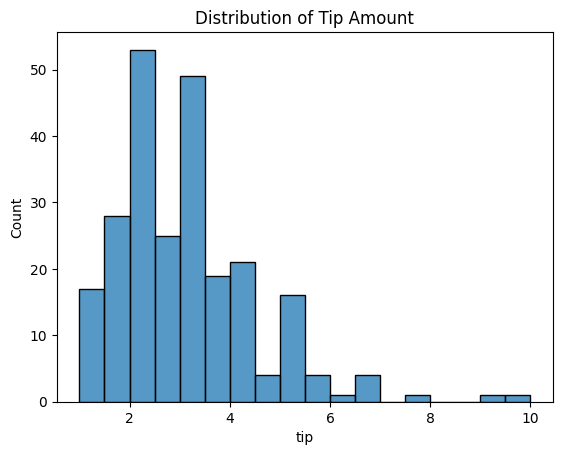

In [53]:
sns.histplot(data=df, x='tip')
plt.title('Distribution of Tip Amount')
plt.show()

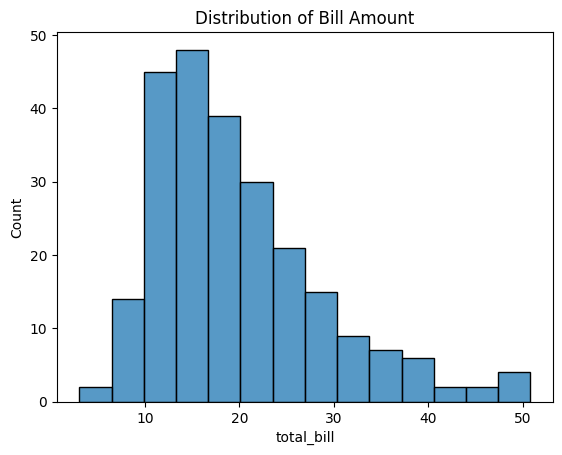

In [54]:
sns.histplot(data=df, x='total_bill')
plt.title('Distribution of Bill Amount')
plt.show()

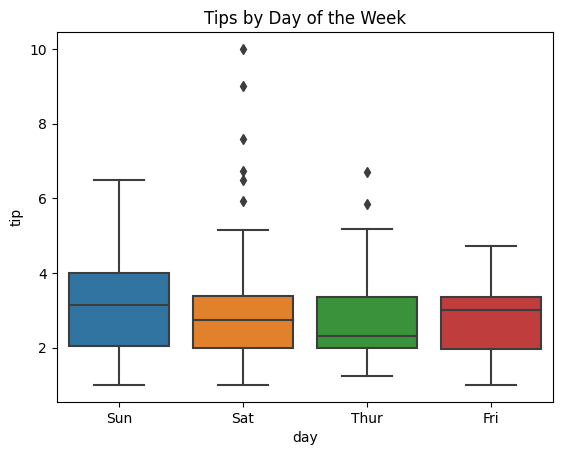

In [55]:
sns.boxplot(data=df, x='day', y='tip')
plt.title('Tips by Day of the Week')
plt.show()

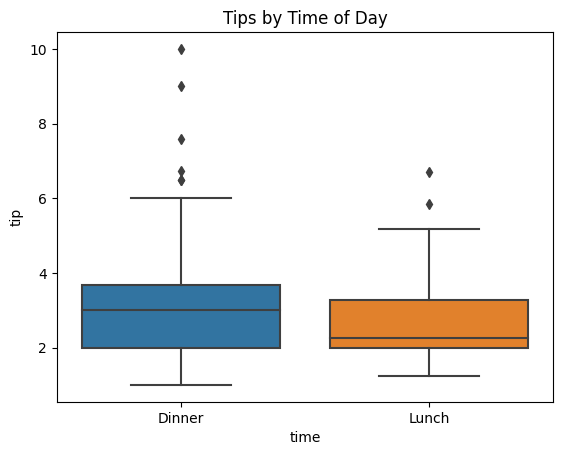

In [56]:
sns.boxplot(data=df, x='time', y='tip')
plt.title('Tips by Time of Day')
plt.show()

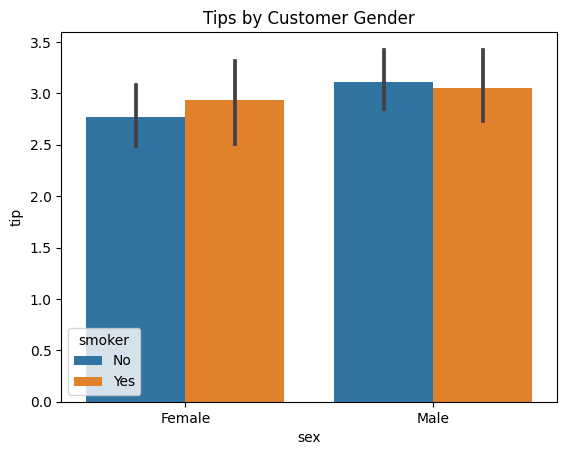

In [57]:
sns.barplot(data=df, x='sex', y='tip', hue="smoker")

plt.title('Tips by Customer Gender')
plt.show()

Now we are done loading the tipping dataset, checking for missing values, and performing several EDA tasks. The histograms show that both the tip amount and bill amount are right-skewed, which may require some data transformation later. The box plots and bar plot reveal some potential relationships between tips and other variables such as day of the week, time of day, and customer gender.

Next, we can split the dataset into a training set and testing set and build our predictive model.




In [58]:
figure = px.scatter(data_frame = df, x="total_bill",y="tip", size="size", color= "day", trendline="ols")
figure.show()

In [59]:
figure = px.scatter(data_frame = df, x="total_bill",y="tip", size="size", color= "time", trendline="ols")
figure.show()

In [60]:
figure = px.pie(df, values='tip', names='day')
figure.show()

In [61]:
figure = px.pie(df, values='tip', names='sex')
figure.show()

In [62]:
figure = px.pie(df, values='tip', names='smoker')
figure.show()

In [63]:
figure = px.pie(df, values='tip', names='time')
figure.show()

<ipython-input-64-5013387ef3f7>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



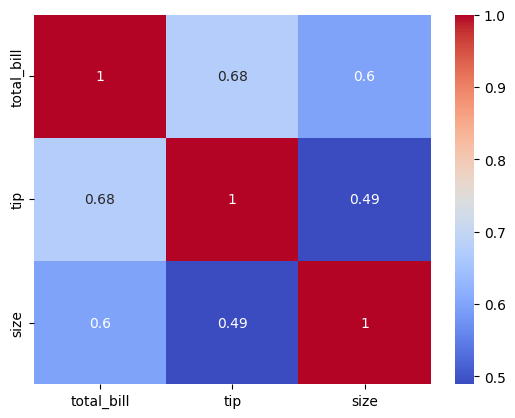

In [64]:
corr = df.corr()
sns.heatmap(corr, cmap="coolwarm", annot=True)

plt.show()

In [65]:
df["sex"] = df["sex"].map({ "Male": 1, "Female": 0})
df["smoker"] = df["smoker"].map({"Yes": 1,"No": 0})
df["day"] = df["day"].map({"Thur": 0, "Fri": 1, "Sat": 2, "Sun": 3})
df["time"] = df["time"].map({"Lunch": 0, "Dinner": 1})
df.sample(5)

,total_bill,tip,sex,smoker,day,time,size
231,15.69,3.00,1,1,2,1,3
196,10.34,2.00,1,1,0,0,2
137,14.15,2.00,0,0,0,0,2
237,32.83,1.17,1,1,2,1,2
160,21.50,3.50,1,0,3,1,4
